In [ ]:
import utils
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import seaborn as sns

import importlib
importlib.reload(utils)

In [6]:
def avg_prob_match(markets, low=0, high=1, num_apps_low=0, num_apps_high=1000):
    outcomes = []
    for market in markets:
        for i in range(market.N):
            if market.student_percentile[i] >= low and market.student_percentile[i] <= high and market.num_apps[i] >= num_apps_low and market.num_apps[i] <= num_apps_high:
                outcomes.append(market.student_matches[i] > -1)
    return np.mean(outcomes)

def avg_prob_top(markets, low=0, high=1):
    outcomes = []
    for market in markets:
        student_rank_of_matches = market.student_rank_of_matches()
        for i in range(market.N):
            if market.student_percentile[i] >= low and market.student_percentile[i] <= high:
                outcomes.append(student_rank_of_matches[i] == 1)
    return np.mean(outcomes)

def avg_student_welfare(markets):
    welfares = []
    for market in markets:
        welfares.append(market.student_welfare())
    return np.mean(welfares)

def avg_college_welfare(markets):
    welfares = []
    for market in markets:
        welfares.append(market.college_welfare())
    return np.mean(welfares)

In [23]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
betas = np.arange(0, 20, 2)
gammas = np.arange(0, 20, 10)

avg_rank_mono = np.zeros((len(betas), len(gammas)))
avg_rank_poly = np.zeros((len(betas), len(gammas)))
avg_college_welfare_mono = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i])
        poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i])
        mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
        poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

        avg_rank_mono[i][j] = avg_student_welfare(mono_markets)
        avg_rank_poly[i][j] = avg_student_welfare(poly_markets)
        avg_college_welfare_mono[i][j] = avg_college_welfare(mono_markets)
        avg_college_welfare_poly[i][j] = avg_college_welfare(poly_markets)

<Figure size 800x800 with 0 Axes>

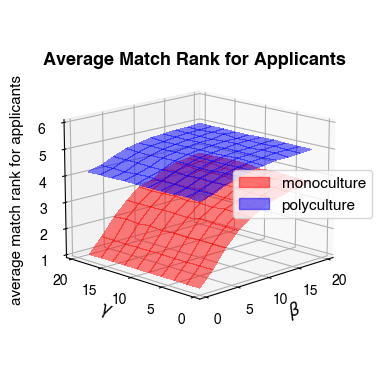

In [28]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, avg_rank_poly, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, avg_rank_mono, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=15, azim=-135)

ax.set_zlim(1, 6)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('average match rank for applicants', rotation=90, fontsize=11)
ax.set_title('Average Match Rank for Applicants', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_student_rank.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 5
betas = np.arange(0, 100, 10)
gammas = np.arange(0, 20, 2)

avg_rank_mono = np.zeros((len(betas), len(gammas)))
avg_rank_poly = np.zeros((len(betas), len(gammas)))
avg_college_welfare_mono = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i])
        poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i])
        mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
        poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

        avg_rank_mono[i][j] = avg_student_welfare(mono_markets)
        avg_rank_poly[i][j] = avg_student_welfare(poly_markets)
        avg_college_welfare_mono[i][j] = avg_college_welfare(mono_markets)
        avg_college_welfare_poly[i][j] = avg_college_welfare(poly_markets)

<Figure size 800x800 with 0 Axes>

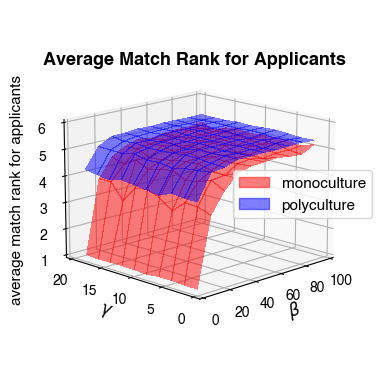

In [16]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, avg_rank_poly, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, avg_rank_mono, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=15, azim=-135)

ax.set_zlim(1, 6)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 100.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('average match rank for applicants', rotation=90, fontsize=11)
ax.set_title('Average Match Rank for Applicants', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_student_rank.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x800 with 0 Axes>

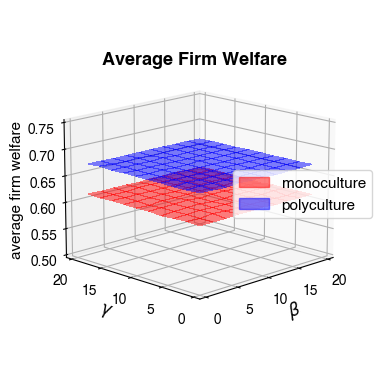

In [25]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, avg_college_welfare_poly, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, avg_college_welfare_mono, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=15, azim=-135)

ax.set_zlim(0.5, 0.75)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('average firm welfare', rotation=90, fontsize=11)
ax.set_title('Average Firm Welfare', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_college_welfare.png', dpi=300, bbox_inches='tight')
plt.show()

# Probability of Matching

In [30]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
num_bins = 20

betas = np.arange(0, 20, 2)
bins = np.arange(num_bins)/num_bins

prob_top_mono = np.zeros((len(betas), len(bins)))
prob_top_poly = np.zeros((len(betas), len(bins)))
prob_match_mono = np.zeros((len(betas), len(bins)))
prob_match_poly = np.zeros((len(betas), len(bins)))

for i in range(len(betas)):
    mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=0)
    poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=0)
    mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
    poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

    for j in range(len(bins)):
        prob_top_mono[i][j] = avg_prob_top(mono_markets, low=bins[j], high=bins[j]+1/num_bins)
        prob_top_poly[i][j] = avg_prob_top(poly_markets, low=bins[j], high=bins[j]+1/num_bins)
        prob_match_mono[i][j] = avg_prob_match(mono_markets, low=bins[j], high=bins[j]+1/num_bins)
        prob_match_poly[i][j] = avg_prob_match(poly_markets, low=bins[j], high=bins[j]+1/num_bins)

<Figure size 800x800 with 0 Axes>

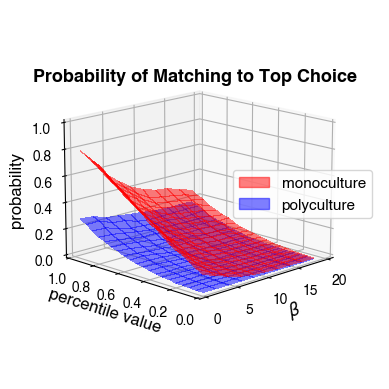

In [39]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, bins_v = np.meshgrid(betas, bins, indexing='ij')
X = betas_v
Y = bins_v

ax.plot_surface(X, Y, prob_top_poly, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, prob_top_mono, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=15, azim=-135)

ax.set_zlim(0, 1)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(0, 1)
ax.set_ylabel('percentile value', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('probability', rotation=90, fontsize=12)
ax.set_title('Probability of Matching to Top Choice', fontsize=13, y=0.85)

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_prob_top.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x800 with 0 Axes>

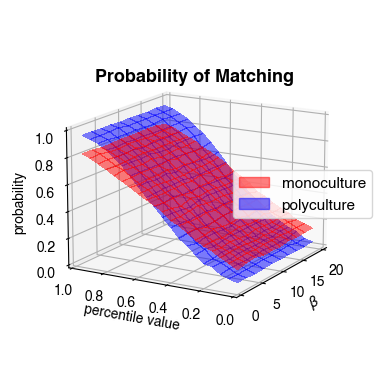

In [38]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, bins_v = np.meshgrid(betas, bins, indexing='ij')
X = betas_v
Y = bins_v

ax.plot_surface(X, Y, prob_match_poly, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, prob_match_mono, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=15, azim=-150)

ax.set_zlim(0, 1)
ax.set_xlabel(r'$\beta$')
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(0, 1)
ax.set_ylabel('percentile value')
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('probability', rotation=90)
ax.set_title('Probability of Matching', fontsize=13, y=0.85)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_prob_match.png', dpi=300, bbox_inches='tight')
plt.show()

# Differential Access

In [96]:
mono_generator_diff = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), access_distribution='uniform', strategy='top')
poly_generator_diff = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), access_distribution='uniform', strategy='top')

In [19]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
betas = np.arange(0, 20, 2)
gammas = np.arange(0, 20, 2)

avg_prob_mono_low = np.zeros((len(betas), len(gammas)))
avg_prob_mono_high = np.zeros((len(betas), len(gammas)))
avg_prob_poly_low = np.zeros((len(betas), len(gammas)))
avg_prob_poly_high = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='random')
        poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='random')
        mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
        poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

        avg_prob_mono_low[i][j] = avg_prob_match(mono_markets, num_apps_low = 1, num_apps_high=5)
        avg_prob_mono_high[i][j] = avg_prob_match(mono_markets, num_apps_low = 6, num_apps_high=10)
        avg_prob_poly_low[i][j] = avg_prob_match(poly_markets, num_apps_low = 1, num_apps_high=5)
        avg_prob_poly_high[i][j] = avg_prob_match(poly_markets, num_apps_low = 6, num_apps_high=10)

<Figure size 800x800 with 0 Axes>

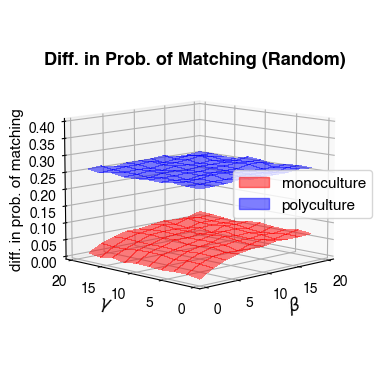

In [20]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, avg_prob_poly_high - avg_prob_poly_low, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, avg_prob_mono_high - avg_prob_mono_low, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=10, azim=-135)

ax.set_zlim(0, 0.4)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('diff. in prob. of matching', rotation=90, fontsize=11)
ax.set_title('Diff. in Prob. of Matching (Random)', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_diff_access_random.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
betas = np.arange(0, 20, 2)
gammas = np.arange(0, 20, 2)

avg_prob_mono_low = np.zeros((len(betas), len(gammas)))
avg_prob_mono_high = np.zeros((len(betas), len(gammas)))
avg_prob_poly_low = np.zeros((len(betas), len(gammas)))
avg_prob_poly_high = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='top')
        poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='top')
        mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
        poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

        avg_prob_mono_low[i][j] = avg_prob_match(mono_markets, num_apps_low = 1, num_apps_high=5)
        avg_prob_mono_high[i][j] = avg_prob_match(mono_markets, num_apps_low = 6, num_apps_high=10)
        avg_prob_poly_low[i][j] = avg_prob_match(poly_markets, num_apps_low = 1, num_apps_high=5)
        avg_prob_poly_high[i][j] = avg_prob_match(poly_markets, num_apps_low = 6, num_apps_high=10)

<Figure size 800x800 with 0 Axes>

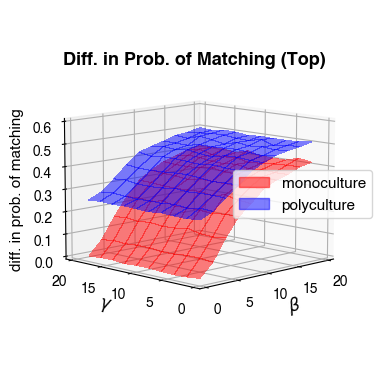

In [27]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, avg_prob_poly_high - avg_prob_poly_low, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, avg_prob_mono_high - avg_prob_mono_low, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=10, azim=-135)

ax.set_zlim(0, 0.6)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('diff. in prob. of matching', rotation=90, fontsize=11)
ax.set_title('Diff. in Prob. of Matching (Top)', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_diff_access_top.png', dpi=300, bbox_inches='tight')
plt.show()

# Differential Access College Welfare

In [6]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
betas = np.arange(0, 20, 2)
gammas = np.arange(0, 20, 2)

avg_college_welfare_mono = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly = np.zeros((len(betas), len(gammas)))
avg_college_welfare_mono_diff = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly_diff = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator_diff = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='random')
        poly_generator_diff = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='random')
        mono_markets_diff = [utils.Market(N, C, college_caps, mono_generator_diff) for _ in range(num_samples)]
        poly_markets_diff = [utils.Market(N, C, college_caps, poly_generator_diff) for _ in range(num_samples)]

        mono_generator = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='total', strategy='random')
        poly_generator = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='total', strategy='random')
        mono_markets = [utils.Market(N, C, college_caps, mono_generator) for _ in range(num_samples)]
        poly_markets = [utils.Market(N, C, college_caps, poly_generator) for _ in range(num_samples)]

        avg_college_welfare_mono[i][j] = avg_college_welfare(mono_markets)
        avg_college_welfare_poly[i][j] = avg_college_welfare(poly_markets)
        avg_college_welfare_mono_diff[i][j] = avg_college_welfare(mono_markets_diff)
        avg_college_welfare_poly_diff[i][j] = avg_college_welfare(poly_markets_diff)

<Figure size 800x800 with 0 Axes>

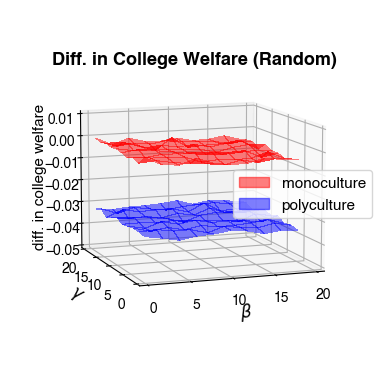

In [16]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, - avg_college_welfare_mono + avg_college_welfare_mono_diff, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, - avg_college_welfare_poly + avg_college_welfare_poly_diff, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=10, azim=-110)

ax.set_zlim(-0.05, 0.01)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('diff. in college welfare', rotation=90, fontsize=11)
ax.set_title('Diff. in College Welfare (Random)', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_diff_access_college_welfare_random.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
N = 1000
C = 10
college_caps = [int(0.5*N/C) for _ in range(C)]
num_samples = 100
betas = np.arange(0, 20, 2)
gammas = np.arange(0, 20, 2)

avg_college_welfare_mono_top = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly_top = np.zeros((len(betas), len(gammas)))
avg_college_welfare_mono_diff_top = np.zeros((len(betas), len(gammas)))
avg_college_welfare_poly_diff_top = np.zeros((len(betas), len(gammas)))

for i in range(len(betas)):
    for j in range(len(gammas)):
        mono_generator_diff_top = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='top')
        poly_generator_diff_top = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='uniform', strategy='top')
        mono_markets_diff_top = [utils.Market(N, C, college_caps, mono_generator_diff_top) for _ in range(num_samples)]
        poly_markets_diff_top = [utils.Market(N, C, college_caps, poly_generator_diff_top) for _ in range(num_samples)]

        mono_generator_top = utils.MonocultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='total', strategy='top')
        poly_generator_top = utils.PolycultureGenerator(partial(np.random.normal, loc=0, scale=0.5), beta=betas[i], gamma=gammas[i], access_distribution='total', strategy='top')
        mono_markets_top = [utils.Market(N, C, college_caps, mono_generator_top) for _ in range(num_samples)]
        poly_markets_top = [utils.Market(N, C, college_caps, poly_generator_top) for _ in range(num_samples)]

        avg_college_welfare_mono_top[i][j] = avg_college_welfare(mono_markets_top)
        avg_college_welfare_poly_top[i][j] = avg_college_welfare(poly_markets_top)
        avg_college_welfare_mono_diff_top[i][j] = avg_college_welfare(mono_markets_diff_top)
        avg_college_welfare_poly_diff_top[i][j] = avg_college_welfare(poly_markets_diff_top)

<Figure size 800x800 with 0 Axes>

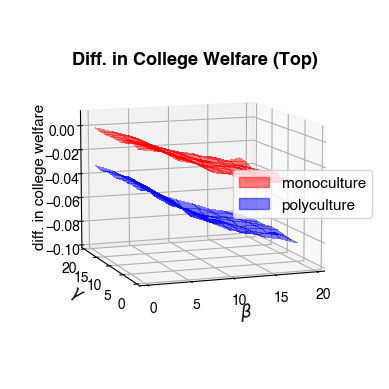

In [18]:
plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

betas_v, gammas_v = np.meshgrid(betas, gammas, indexing='ij')
X = betas_v
Y = gammas_v

ax.plot_surface(X, Y, - avg_college_welfare_mono_top + avg_college_welfare_mono_diff_top, color='red', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.plot_surface(X, Y, - avg_college_welfare_poly_top + avg_college_welfare_poly_diff_top, color='blue', linewidth=0, antialiased=False, alpha=0.5, shade=False)

ax.view_init(elev=10, azim=-110)

ax.set_zlim(-0.1, 0.01)
ax.set_xlabel(r'$\beta$', fontsize=12)
ax.set_xlim(-0.5, 20.5)
ax.set_ylim(-0.5, 20.5)
ax.set_ylabel(r'$\gamma$', fontsize=12)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('diff. in college welfare', rotation=90, fontsize=11)
ax.set_title('Diff. in College Welfare (Top)', fontsize=13, y=0.9)

# plt.locator_params(axis='x', nbins=5)
# plt.locator_params(axis='y', nbins=5)

red_patch = matplotlib.patches.Patch(color='red', alpha=0.5, label='monoculture')
blue_patch = matplotlib.patches.Patch(color='blue', alpha=0.5, label='polyculture')
plt.legend(handles=[red_patch, blue_patch], loc='right', fontsize=11)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig('corr_diff_access_college_welfare_top.png', dpi=300, bbox_inches='tight')
plt.show()